In [1]:
# 导入常见包
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['figure.dpi'] = 200

In [2]:
# 读取图片
img = cv2.imread('./images/baby.jpg')
img_cvt = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

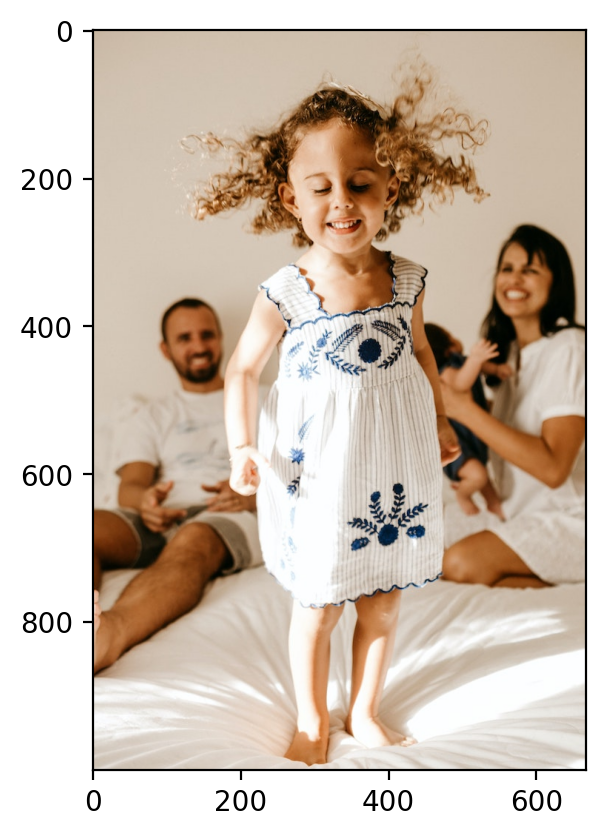

In [3]:
plt.imshow(img_cvt)

In [4]:
# 导入实例分割得包
# 导入pixellib
import pixellib

In [5]:
# 导入实例分割
from pixellib.instance import instance_segmentation

In [6]:
# 实例化
instance = instance_segmentation()
# 加载模型
instance.load_model('./weights/mask_rcnn_coco.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
# 实例分割
target_classes = instance.select_target_classes(person=True)
results,output = instance.segmentFrame(img.copy(),segment_target_classes=target_classes)

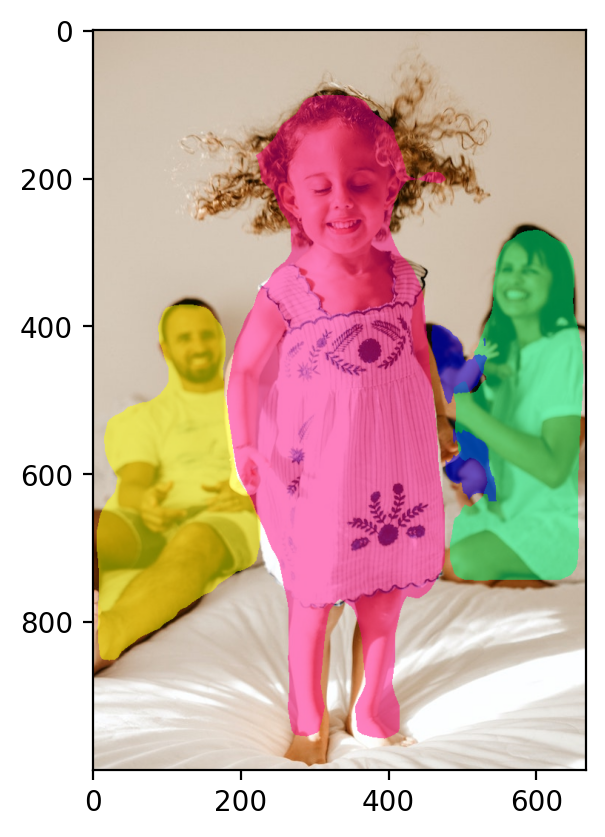

In [8]:
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))

In [9]:
# 根据实例分割结果构造蒙版
# 构造弹幕文字图片，蒙版处理
# 将弹幕与原图合成

In [10]:
# 创建黑色背景图
black_bg = np.zeros((img.shape[:2]))

In [11]:
# black_bg[0:100,0:200]=255

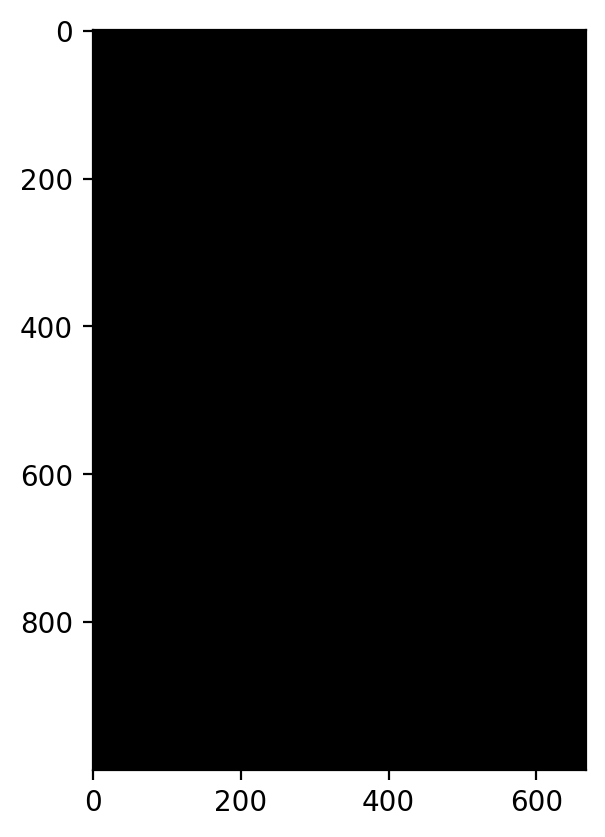

In [12]:
plt.imshow(black_bg,cmap='gray')

In [13]:
person_count = len(results['class_ids'])
mask = results['masks']
person_count


4

In [14]:
results

{'rois': array([[ 56, 130, 963, 552],
        [268, 463, 761, 663],
        [336,   0, 855, 242],
        [396, 457, 641, 555]]),
 'class_ids': array([1, 1, 1, 1]),
 'scores': array([0.9994848, 0.9990723, 0.9980567, 0.9117206], dtype=float32),
 'masks': array([[[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]],
 
        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]],
 
        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         ...,
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False

In [15]:
mask.shape

(1000, 667, 4)

In [16]:
# 将多个人结果合成一个蒙版
for p_index in range(person_count):
    black_bg = np.where(mask[:,:,p_index]==True,255,black_bg)

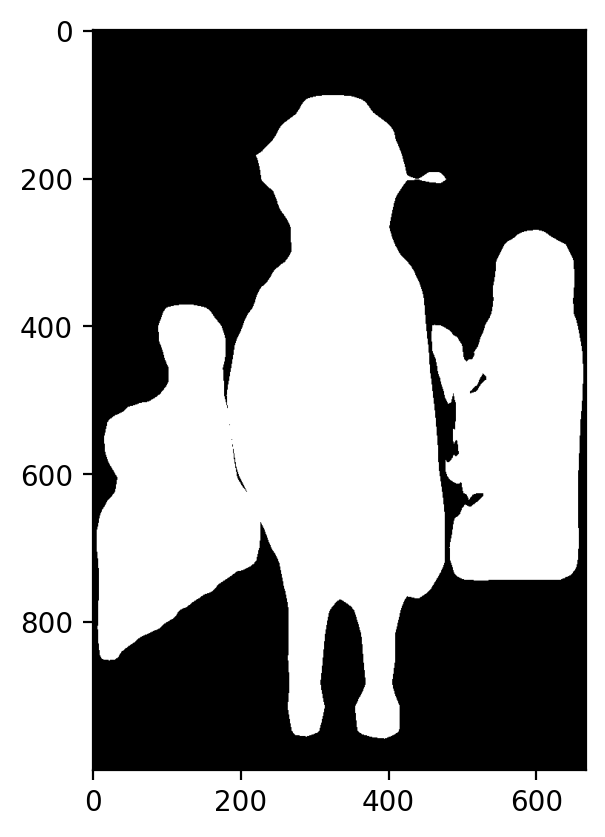

In [17]:
plt.imshow(black_bg,cmap='gray')

In [18]:
# 构造弹幕图片
from PIL import Image,ImageDraw,ImageFont

In [19]:
h = img.shape[0]
w = img.shape[1]

In [20]:
# 创建透明地图
trans_bg = Image.new("RGBA",(w,h),(255,0,255,0))

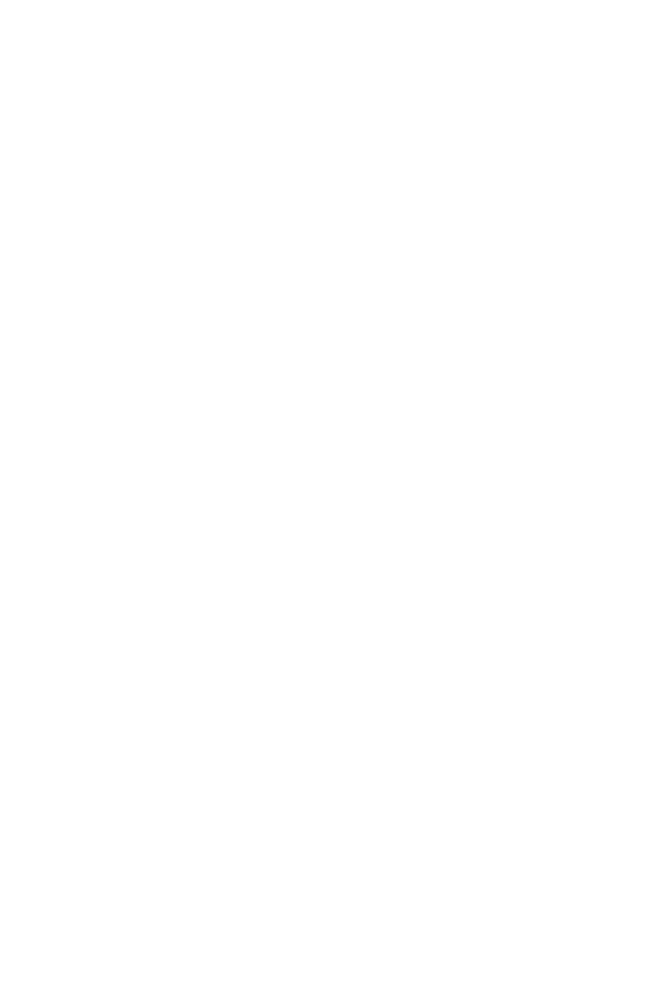

In [21]:
trans_bg

In [22]:
# h绘制
d = ImageDraw.Draw(trans_bg)

In [23]:
font = ImageFont.truetype('./fonts/MSYH.ttc',40,encoding='utf-8')

In [24]:
d.text((10,10),'知行合一知行合一知行合一知行合一知行合一知行合一',font=font,fill=(255,0,255,255))
d.text((10,80),'好好学习知行合一知行合一知行合一知行合一知行合一',font=font,fill=(255,0,255,255))
d.text((10,150),'天天向上天天向上天天向上天天向上天天向上天天向上',font=font,fill=(255,0,255,255))
d.text((10,220),'机器视觉机器视觉机器视觉机器视觉机器视觉机器视觉',font=font,fill=(255,0,255,255))
d.text((10,290),'我喜欢人工智能我喜欢人工智能我喜欢人工智能我喜欢人工智能',font=font,fill=(255,0,255,255))

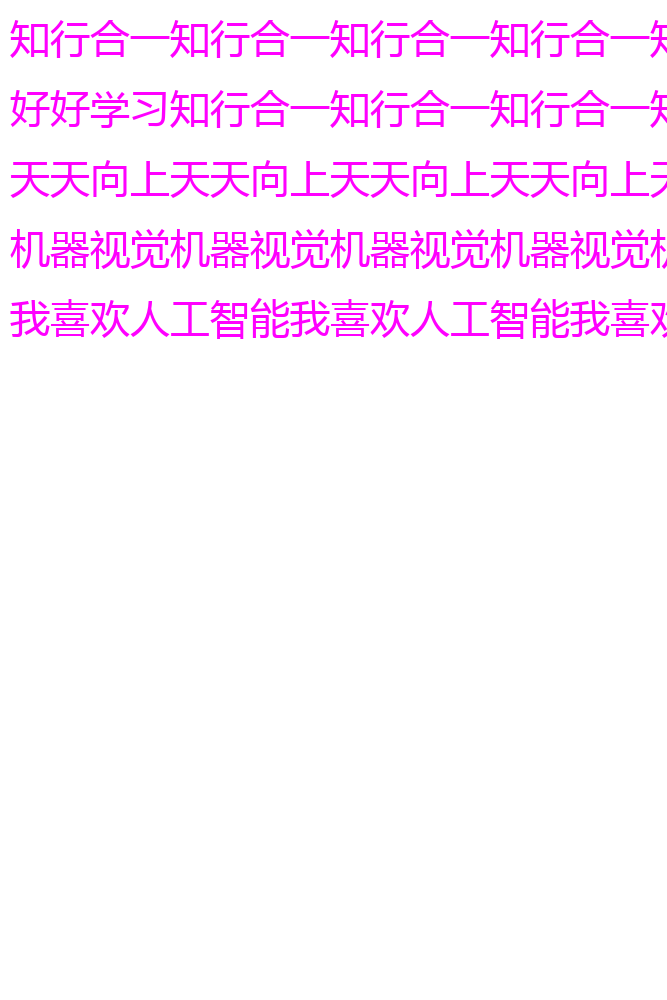

In [25]:
trans_bg

In [26]:
# 将弹幕层图片蒙版处理
trans_bg_np = np.asarray(trans_bg)

In [27]:
trans_bg_np.shape

(1000, 667, 4)

In [28]:
# alpha通道设置
trans_bg_np = trans_bg_np.copy()
trans_bg_np[:,:,3] = np.where(black_bg==255,0,trans_bg_np[:,:,3])

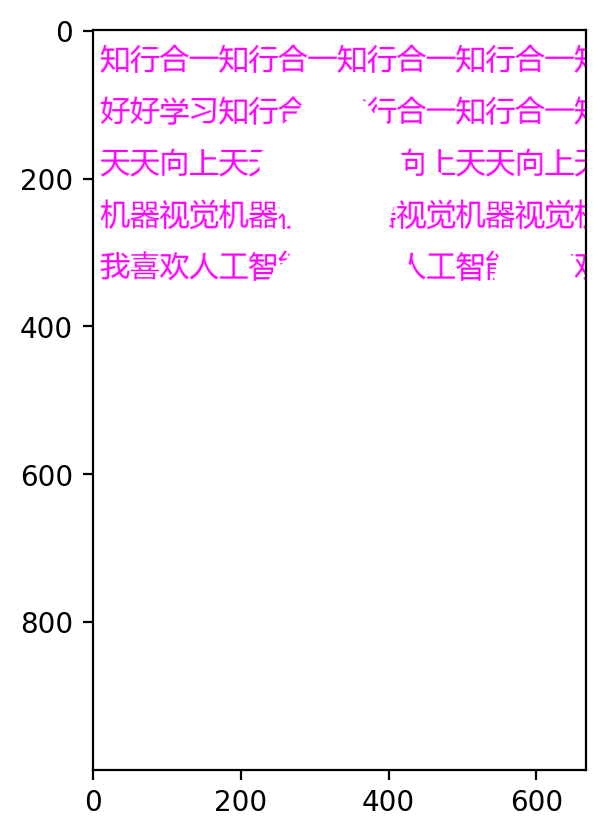

In [29]:
plt.imshow(trans_bg_np)

In [30]:
trans_bg_np_pil = Image.fromarray(trans_bg_np)
# 将原图转为RGBA
img_rgba = cv2.cvtColor(img,cv2.COLOR_BGR2RGBA)
img_pil = Image.fromarray(img_rgba)

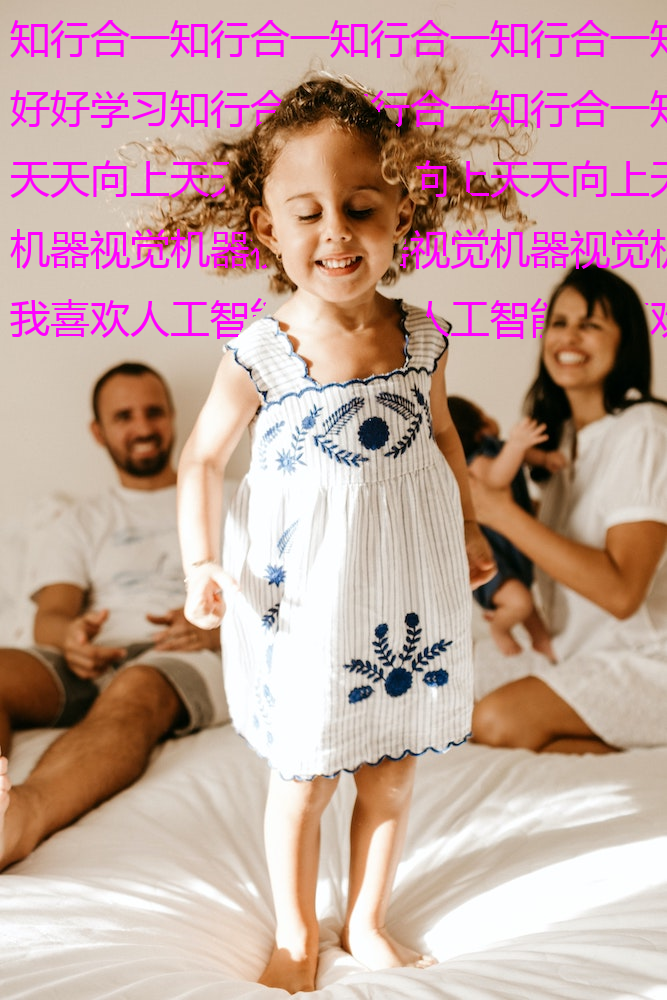

In [31]:
Image.alpha_composite(img_pil,trans_bg_np_pil)